In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('kyphosis.csv') #wirbelsäulenkrümmung

In [10]:
df.head() # Kyphosis absent after operation?#
# age in months
# number of vertebrae involved

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


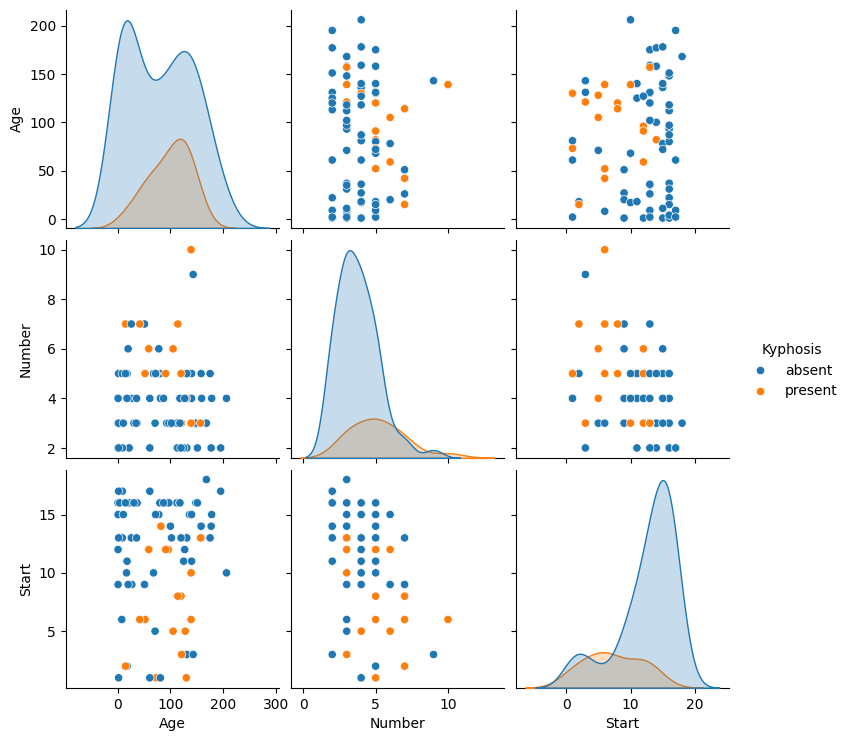

In [11]:
sns.pairplot(df, hue='Kyphosis')

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop('Kyphosis', axis=1)
y = df['Kyphosis']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predictions = dtree.predict(X_test)

In [26]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))

[[11  3]
 [ 2  1]]


In [17]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

      absent       0.85      0.79      0.81        14
     present       0.25      0.33      0.29         3

    accuracy                           0.71        17
   macro avg       0.55      0.56      0.55        17
weighted avg       0.74      0.71      0.72        17



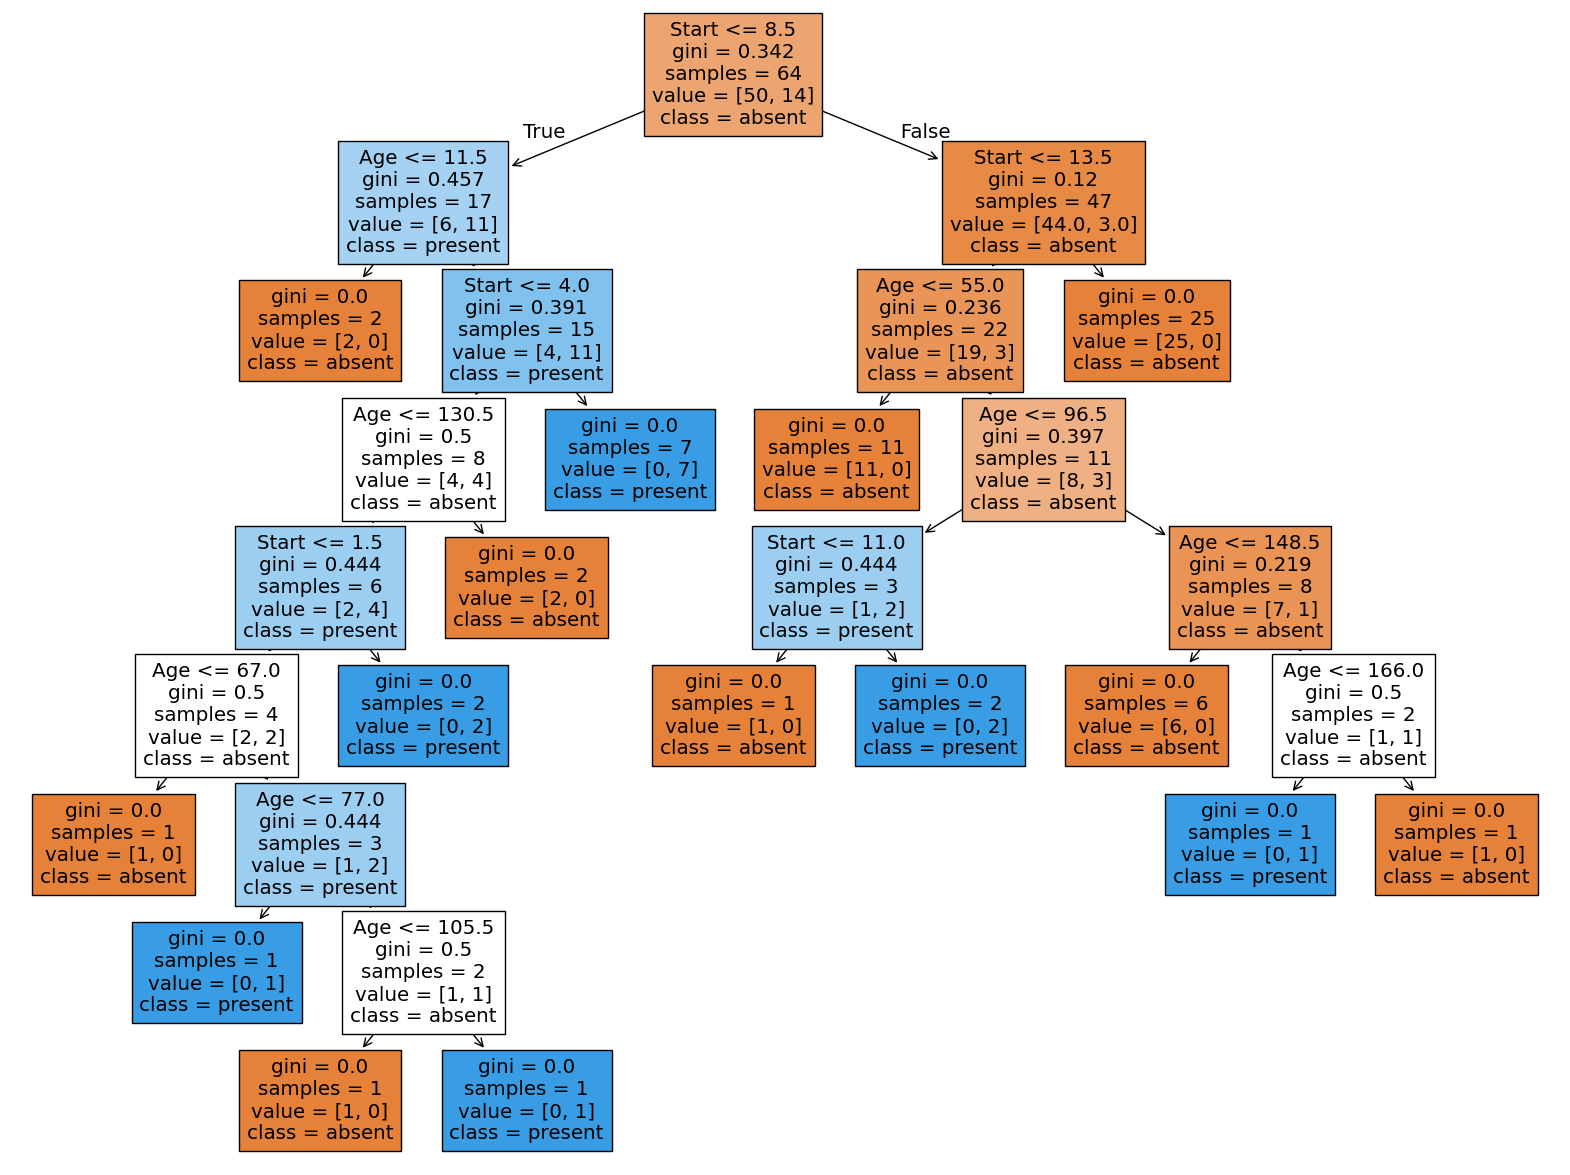

In [29]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,15))
plot_tree(dtree, feature_names=X.columns, class_names=['absent', 'present'], filled=True)
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200) #n_estimators = number of trees
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test, rfc_pred))

[[14  0]
 [ 3  0]]


In [21]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

      absent       0.82      1.00      0.90        14
     present       0.00      0.00      0.00         3

    accuracy                           0.82        17
   macro avg       0.41      0.50      0.45        17
weighted avg       0.68      0.82      0.74        17



/Users/jonas/Projekte/learning_ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jonas/Projekte/learning_ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/jonas/Projekte/learning_ml/.venv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [22]:
df['Kyphosis'].value_counts()

Kyphosis
absent     64
present    17
Name: count, dtype: int64

In [23]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))

0.7058823529411765


In [24]:
print(accuracy_score(y_test, rfc_pred))

0.8235294117647058
